In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, SimpleRNN

In [45]:
# data = pd.read_csv("goog.csv",parse_dates=['Date'],index_col='Date')
data = yf.download('GOOGL',start='2018-01-01',end='2023-12-31')
data = data[['Close']].dropna()
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,GOOGL
Date,
2018-01-02,53.405170
2018-01-03,54.316319
2018-01-04,54.527306
2018-01-05,55.250351
2018-01-08,55.445415


In [37]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [38]:
x=[]
y=[]
seq_len=10

for i in range(seq_len,len(scaled_data)):
    x.append(scaled_data[i-seq_len:i])
    y.append(scaled_data[i])

x = np.array(x)
y = np.array(y)

In [39]:
split = int(0.8*len(x))
x_train,x_test = x[:split],x[split:]
y_train,y_test = y[:split],y[split:]

In [40]:
model = Sequential([
    Input(shape=(seq_len,1)),
    SimpleRNN(50,activation='tanh'),
    Dense(1)
])

In [41]:
model.compile(optimizer='adam',loss='mean_squared_error')
history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0744 - val_loss: 0.0039
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - val_loss: 0.0032
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.0299e-04 - val_loss: 0.0014
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.4702e-04 - val_loss: 0.0012
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9387e-04 - val_loss: 0.0011
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2716e-04 - val_loss: 0.0016
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.0665e-04 - val_loss: 0.0011
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.9485e-04 - val_loss: 0.0013


In [42]:
loss = model.evaluate(x_test,y_test);
print(f"Test loss: {loss:.2f}") 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 
Test loss: 0.00


In [43]:
predicted = model.predict(x_test)
predicted = scaler.inverse_transform(predicted)
actual = scaler.inverse_transform(y_test.reshape(-1,1))

for i in range(min(10,len(actual))):
    print(f"Predicted: {predicted[i][0]:.2f} Actual: {actual[i][0]:.2f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted: 98.46 Actual: 99.49
Predicted: 98.21 Actual: 100.65
Predicted: 98.22 Actual: 102.03
Predicted: 99.71 Actual: 103.98
Predicted: 100.34 Actual: 94.48
Predicted: 101.86 Actual: 91.78
Predicted: 94.63 Actual: 95.83
Predicted: 93.02 Actual: 94.06
Predicted: 95.10 Actual: 90.04
Predicted: 94.03 Actual: 86.56


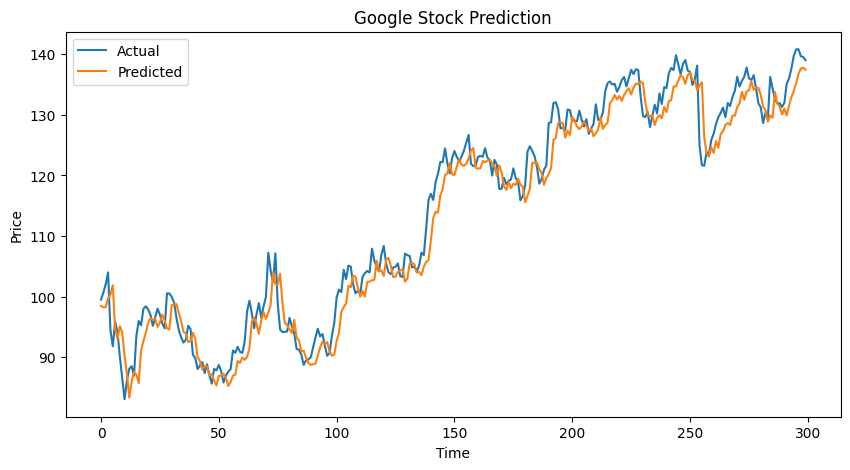

In [44]:
plt.figure(figsize=(10,5))
plt.plot(actual,label='Actual')
plt.plot(predicted,label='Predicted')
plt.title("Google Stock Prediction")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()